In [44]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime

In [45]:
url = "https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019"
url_get = requests.get(url)
soup = BeautifulSoup(url_get.content, 'html.parser')

Using soup.find to get content from table class="table" in HTML

In [46]:
table = soup.find('table', attrs={'class' : 'table'})

Using `find_all('tr' attrs={'class':'verySoftGreyBg'})` to get table row content from table and using `len(tr)` to get row count

In [47]:
tr = table.find_all('tr')
len(tr)

247

using `for...in...:` to iterate every row and extract the text inside with `[0]` for TANGGAL column, `[1]` for ASK column, and `[2]` for BID column

`temp = []` to make empty tupple and `temp.append((tanggal, kurs_jual, kurs_beli))` to merge value from `tanggal`, `kurs_jual`, `kurs_beli` variables

`temp = temp[::-1]` to reverse the order inside `temp` variable

In [48]:
temp =[]

for i in range (1, len(tr)):
    row = table.find_all('tr')[i]
    #get Tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()
    #get kurs_jual
    kurs_jual = row.find_all('td')[1].text
    kurs_jual = kurs_jual.strip()
    #get kurs_beli
    kurs_beli = row.find_all('td')[2].text
    kurs_beli = kurs_beli.strip()
    temp.append((tanggal, kurs_jual, kurs_beli))

temp = temp[::-1]


using `pandas` library to make DataFrame from `temp` variable

In [49]:
df = pd.DataFrame(temp, columns = ('Tanggal', 'Kurs Beli', 'Kurs Jual'))
df.head()

,Tanggal,Kurs Beli,Kurs Jual
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [50]:
df.dtypes

Tanggal      object
Kurs Beli    object
Kurs Jual    object
dtype: object

Replace `,` with `.` so `Kurs Beli` and `Kurs Jual` can be changed to `float64`

In [51]:
df['Kurs Beli'] = df['Kurs Beli'].str.replace(",", ".")
df['Kurs Jual'] = df['Kurs Jual'].str.replace(",", ".")
df[['Kurs Beli', 'Kurs Jual']] = df[['Kurs Beli', 'Kurs Jual']].astype('float64')
df.dtypes

Tanggal       object
Kurs Beli    float64
Kurs Jual    float64
dtype: object

Replace all month name in `Tanggal` column to english using `str.replace()` so it's possible to change dtypes from `object` to `datetime64`

In [52]:
df['Tanggal'] = df['Tanggal'].str.replace("Januari", "Jan")
df['Tanggal'] = df['Tanggal'].str.replace("Februari", "Feb")
df['Tanggal'] = df['Tanggal'].str.replace("Maret", "Mar")
df['Tanggal'] = df['Tanggal'].str.replace("April", "Apr")
df['Tanggal'] = df['Tanggal'].str.replace("Mei", "May")
df['Tanggal'] = df['Tanggal'].str.replace("Juni", "Jun")
df['Tanggal'] = df['Tanggal'].str.replace("Juli", "Jul")
df['Tanggal'] = df['Tanggal'].str.replace("Agustus", "Aug")
df['Tanggal'] = df['Tanggal'].str.replace("September", "Sep")
df['Tanggal'] = df['Tanggal'].str.replace("Oktober", "Oct")
df['Tanggal'] = df['Tanggal'].str.replace("November", "Nov")
df['Tanggal'] = df['Tanggal'].str.replace("Desember", "Dec")

using `dayfirst=True` because in the column the datetime format is `%d/%m/%y`

In [53]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)

make `Tanggal` as index

make new variable `tanggal2019` with date value from 1 January 2019 until 31 December 2019 to reindex `Tanggal` because on the website, Saturday, Sunday and other holiday is N/A

In [54]:
df.set_index('Tanggal', inplace=True)

In [55]:
tanggal2019 = pd.date_range(start='2019-01-01', end='2019-12-31')
tanggal2019

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [56]:
df = df.reindex(tanggal2019)
df

,Kurs Beli,Kurs Jual
2019-01-01,NaN,NaN
2019-01-02,132.89,131.54
2019-01-03,135.44,134.08
2019-01-04,133.51,132.17
2019-01-05,NaN,NaN
...,...,...
2019-12-27,128.11,126.83
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN
2019-12-30,128.30,127.02


Using `fillna(method='ffill')` to fill NaN with next row value, and `fillna(mehod='bfill')` to fill NaN with last row value

In [57]:
df = df.fillna(method='ffill').fillna(method='bfill')
df

,Kurs Beli,Kurs Jual
2019-01-01,132.89,131.54
2019-01-02,132.89,131.54
2019-01-03,135.44,134.08
2019-01-04,133.51,132.17
2019-01-05,133.51,132.17
...,...,...
2019-12-27,128.11,126.83
2019-12-28,128.11,126.83
2019-12-29,128.11,126.83
2019-12-30,128.30,127.02


Using line plot to see the trend for Yen Currency in 2019

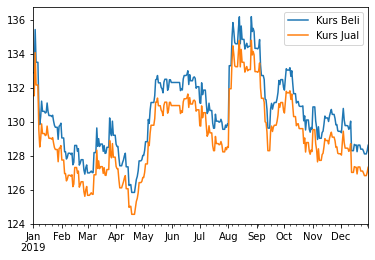

In [58]:
df.plot(kind='line')

Dapat dilihat dari plot diatas bahwa nilai paling tinggi untuk Kurs Yen di tahun 2019 pada bulan Agusstus - September

Nilai Kurs pada awal Januari dan akhir Desember terlihat menurun walau pada Agustus - September terdapat kenaikan nilai Kurs